# Kanji Radical Match

Loading data, training, and output.

In [1]:
import utils as u
import torch.nn as nn
import torch
import numpy as np
from utils import KanjiFFNN
import torch.optim as optim
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
# eng_to_rads = u.load_eng_to_rads()
eng_to_rads = u.json_to_dict('./data/english_to_radicals.json')
eng_tens, rad_tens, eng_vocab, rad_vocab = u.dict_to_tensors(eng_to_rads)

In [3]:
print("Vocabulary size:", len(eng_vocab))
print("Radical vocabulary size:", len(rad_vocab))

Vocabulary size: 12091
Radical vocabulary size: 253


In [4]:
# Print a small sample of our data
print(eng_tens[:5])
print(eng_vocab[:5])
print(rad_tens[:5])
print(rad_vocab[:5])

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
['"male" principle' '"summer"' '%' "'kimono' sleeve" "(Cantonese) don't!"]
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
['ノ' 'ハ' 'マ' 'ユ' 'ヨ']


In [5]:
# Example
print(len(u.get_tensor_from_word("eight", eng_tens, eng_vocab)))

12091


In [7]:
e2r_model = KanjiFFNN(eng_tens.size(0), rad_tens.size(-1))
criterion = nn.BCELoss()
optimizer = optim.Adam(e2r_model.parameters(), lr=1e-3)
lr_scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
e2r_model.eval()

KanjiFFNN(
  (input): Linear(in_features=12091, out_features=253, bias=True)
  (hid1): Linear(in_features=253, out_features=253, bias=True)
  (output): Linear(in_features=253, out_features=253, bias=True)
)

In [8]:
epochs = 10

history = e2r_model.train_fit(eng_tens, rad_tens, optimizer, criterion, epochs=epochs, scheduler=lr_scheduler, verbose=True)

Epoch: 1  Loss: 0.15996047854423523  Accuracy: 7.261682242990654%
Epoch: 2  Loss: 0.17957183718681335  Accuracy: 3.609544289140683%
Epoch: 3  Loss: 0.15820841491222382  Accuracy: 5.55570258870234%
Epoch: 4  Loss: 0.1119769960641861  Accuracy: 9.207757836407245%
Epoch: 5  Loss: 0.09033462405204773  Accuracy: 12.6575138532793%
Epoch: 6  Loss: 0.06701738387346268  Accuracy: 13.447771069390456%
Epoch: 7  Loss: 0.046863142400979996  Accuracy: 13.700355636423787%
Epoch: 8  Loss: 0.024166114628314972  Accuracy: 13.517575055826647%
Epoch: 9  Loss: 0.009078559465706348  Accuracy: 14.726821602845092%
Epoch: 10  Loss: 0.004666093736886978  Accuracy: 14.334877181374576%


In [9]:
torch.save(e2r_model, "./models/model_v3.pt")

In [10]:
torch.save(e2r_model.state_dict(), "./models/model_v3_state_dict.pt")

In [11]:
loaded_model = KanjiFFNN(eng_tens.size(1), rad_tens.size(1))
loaded_model.load_state_dict(torch.load("./models/model_v3_state_dict.pt"))
loaded_model.eval()

KanjiFFNN(
  (input): Linear(in_features=12091, out_features=253, bias=True)
  (hid1): Linear(in_features=253, out_features=253, bias=True)
  (output): Linear(in_features=253, out_features=253, bias=True)
)

In [12]:
# For direct usage
loaded_model = e2r_model

In [13]:
input_word = "eight"
test_tensor = u.get_tensor_from_word(input_word, eng_tens, eng_vocab)
res = loaded_model(test_tensor)
print(res)

tensor([1.2113e-03, 4.2460e-01, 7.0207e-06, 6.3727e-12, 9.2695e-04, 3.2195e-02,
        2.2534e-05, 7.2093e-05, 1.9209e-05, 9.6665e-07, 7.4572e-08, 6.4540e-04,
        3.1095e-07, 3.9191e-10, 5.6854e-05, 3.3079e-10, 2.2570e-02, 1.4231e-07,
        4.2647e-06, 7.2938e-10, 7.4560e-04, 2.9759e-07, 5.5172e-07, 3.1294e-03,
        4.7158e-08, 6.5234e-06, 3.0510e-07, 1.0838e-02, 6.0840e-06, 1.7165e-03,
        7.3838e-07, 1.9734e-06, 4.6278e-05, 2.3517e-03, 3.4181e-01, 6.3479e-08,
        7.9532e-01, 2.5578e-01, 5.8962e-05, 4.9696e-04, 2.0068e-05, 7.2541e-02,
        2.6505e-04, 2.4626e-04, 3.0347e-05, 1.0441e-01, 3.3217e-03, 6.9247e-03,
        8.3191e-08, 8.2495e-01, 1.2069e-04, 9.0279e-04, 5.5015e-04, 5.6743e-04,
        1.6056e-04, 3.6582e-09, 5.1648e-06, 8.1228e-11, 3.5303e-02, 3.6402e-05,
        1.1998e-04, 6.4968e-03, 8.4279e-08, 1.7699e-04, 4.8910e-10, 3.3274e-10,
        1.7242e-04, 5.6178e-07, 3.9381e-05, 9.9773e-04, 1.2692e-10, 3.4690e-05,
        8.6042e-05, 1.9008e-03, 1.5425e-

In [14]:
output_probs = res.detach().numpy().squeeze()
radical_probs = [(radical, prob) for radical, prob in zip(np.array(rad_vocab), output_probs)]
sorted_radical_probs = sorted(radical_probs, key=lambda x: x[1], reverse=True)
print(sorted_radical_probs[:15])

[('口', 0.82495105), ('力', 0.7953199), ('扎', 0.7531933), ('ハ', 0.42459527), ('刈', 0.34181195), ('勹', 0.25577828), ('斤', 0.14189431), ('厂', 0.10440944), ('匚', 0.07254069), ('金', 0.049144566), ('廾', 0.048023503), ('目', 0.04428898), ('女', 0.035303324), ('一', 0.03219498), ('亅', 0.022570252)]


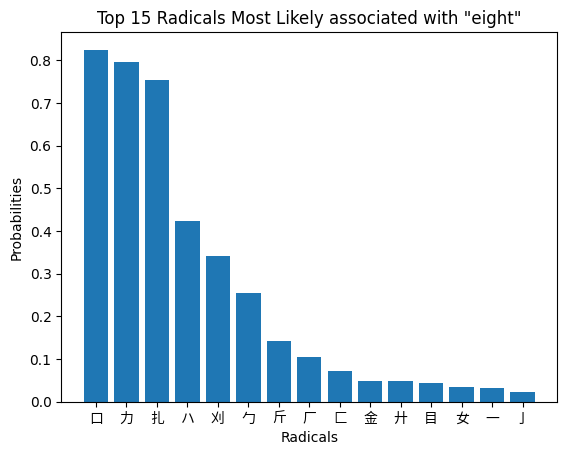

In [15]:
TOP_TAKE = 15
fprop = fm.FontProperties(fname='NotoSansCJKtc-Regular.otf')

radicals, probabilities = zip(*sorted_radical_probs)

radicals_top = list(radicals[:TOP_TAKE])
probabilities_top = list(probabilities[:TOP_TAKE])

fig, axs = plt.subplots()
axs.bar(range(TOP_TAKE), probabilities_top)
axs.set_xticks(range(TOP_TAKE), radicals_top, fontproperties=fprop)
axs.set_xlabel('Radicals')
axs.set_ylabel('Probabilities')
axs.set_title(f'Top {TOP_TAKE} Radicals Most Likely associated with \"{input_word}\"')

plt.show()

In [16]:
with torch.no_grad():
    preds = loaded_model(eng_tens)
    preds = (preds > 0.5)
    print('Precision:', precision_score(rad_tens, preds, average='micro'))
    print('Recall:', recall_score(rad_tens, preds, average='micro'))
    print('F1 Score:', f1_score(rad_tens, preds, average='micro'))
    print('Accuracy:', accuracy_score(rad_tens, preds))

Precision: 0.8775259727912323
Recall: 0.5918826588314853
F1 Score: 0.7069407308377896
Accuracy: 0.36465139359854437
